In [62]:
from Landscape import Landscape
from CogLandscape import CogLandscape
from BinaryLandscape import BinaryLandscape
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"

ModuleNotFoundError: No module named 'BinaryLandscape'

In [61]:
N = 9
K = 1
state_num = 4
np.random.seed(1000)
landscape = Landscape(N=N, K=K, state_num=state_num)
cog_landscape = CogLandscape(landscape=landscape, expertise_domain=list(range(N)),
                             expertise_representation=["A", "B"], norm=False)
binary_landscape = BinaryLandscape(N=N, K=K, K_within=None, K_between=None)
data = list(landscape.cache.values())
cog_data = list(cog_landscape.cache.values())
bin_data = list(binary_landscape.cache.values())
with open("cache", "wb") as outfile:
    pickle.dump(data, outfile)
with open("cog_cache", "wb") as outfile:
    pickle.dump(cog_data, outfile)
with open("bin_cache", "wb") as outfile:
    pickle.dump(bin_data, outfile)

with open("cache", "rb") as infile:
    data = pickle.load(infile)
with open("cog_cache", "rb") as infile:
    cog_data = pickle.load(infile)
with open("bin_cache", "rb") as infile:
    bin_data = pickle.load(infile)
# The density exceed 1 because the length of x-axis is 1 (too small); the area below the density curve must be 1
# Hist 1: Multi-State Landscape
plt.hist(data, bins=40, color=shallow_purple, alpha=0.5, density=True, label='Multi-State Landscape')
kde1 = gaussian_kde(data)
x_values1 = np.linspace(min(data), max(data), 40)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, '-', color=deep_purple)

# Hist 2: Cognitive Landscape
plt.hist(cog_data, bins=40, alpha=0.5, label='Cognitive Landscape', color=shallow_cyan, density=True)
kde2 = gaussian_kde(cog_data)
x_values2 = np.linspace(min(cog_data), max(cog_data), 40)
pdf2 = kde2(x_values2)
plt.plot(x_values2, pdf2, '-', color=deep_cyan)

# Hist 3: Binary Landscape
plt.hist(bin_data, bins=40, alpha=0.5, label='Binary Landscape', color=shallow_grey, density=True)
kde3 = gaussian_kde(bin_data)
x_values3 = np.linspace(min(bin_data), max(bin_data), 40)
pdf3 = kde2(x_values3)
plt.plot(x_values3, pdf3, '-', color=deep_grey)

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Landscape and CogLandscape Distribution')
plt.legend()
plt.savefig("landscape_distribution.png", transparent=True, dpi=300)
# Show the plot
plt.show()

NameError: name 'BinaryLandScape' is not defined

In [11]:
# Sample data for two distributions
data1 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6]
data2 = [2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9]

# Estimating the probability density functions (PDFs)
pdf1 = gaussian_kde(data1)
pdf2 = gaussian_kde(data2)

# Creating a common support grid
x = np.linspace(min(min(data1), min(data2)), max(max(data1), max(data2)), num=100)

# Evaluating the PDFs on the common support grid
pdf1_vals = pdf1(x)
pdf2_vals = pdf2(x)

# Calculating the KL divergence
kl_divergence = kl_div(pdf1_vals, pdf2_vals).sum()

print(f"KL Divergence: {kl_divergence}")


KL Divergence: 4.3545587337686475


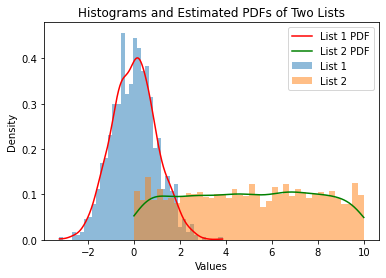

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random numbers
np.random.seed(42)  # To ensure reproducibility

# List 1 (Normal Distribution)
list1 = np.random.normal(loc=0, scale=1, size=1000)

# List 2 (Uniform Distribution)
list2 = np.random.uniform(low=0, high=10, size=2000)

# Plot histograms
plt.hist(list1, bins=40, density=True, alpha=0.5, label='List 1')

# Estimate PDF for List 1
kde1 = gaussian_kde(list1)
x_values1 = np.linspace(list1.min(), list1.max(), 1000)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, 'r-', label='List 1 PDF')

plt.hist(list2, bins=40, density=True, alpha=0.5, label='List 2')

# Estimate PDF for List 2
kde2 = gaussian_kde(list2)
x_values2 = np.linspace(list2.min(), list2.max(), 1000)
pdf2 = kde2(x_values2)
plt.plot(x_values2, pdf2, 'g-', label='List 2 PDF')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histograms and Estimated PDFs of Two Lists')
plt.legend()

# Show the plot
plt.show()



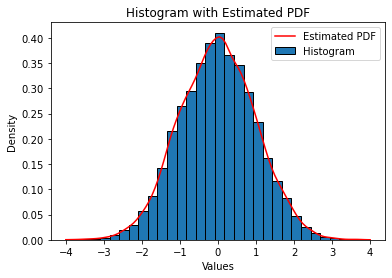

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate 1000 values from an unknown distribution
values = np.random.randn(10000)

# Plot histogram with density=True
plt.hist(values, bins=30, edgecolor='black', density=True, label='Histogram')

# Generate range for x values
x = np.linspace(-4, 4, 100)

# Estimate the PDF using kernel density estimation
kde = gaussian_kde(values)
pdf = kde.evaluate(x)

# Plot estimated PDF lines
plt.plot(x, pdf, color='red', label='Estimated PDF')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Estimated PDF')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (30,)

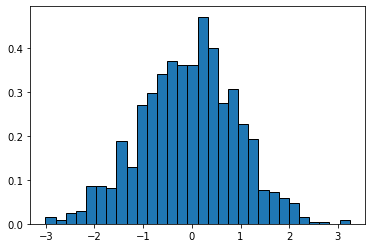

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 values from a normal distribution with mean 0 and standard deviation 1
values = np.random.normal(0, 1, 1000)

# Plot histogram with density=True
plt.hist(values, bins=30, edgecolor='black', density=True, label='Histogram')

# Generate range for x values
x = np.linspace(-4, 4, 100)

# Estimate PDF using histogram values
hist, bins = np.histogram(values, bins=30, density=True)
bin_width = bins[1] - bins[0]
pdf = hist / (bin_width * len(values))

# Plot estimated PDF lines
plt.plot(x, pdf, color='red', label='Estimated PDF')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Estimated PDF')
plt.legend()
plt.show()
